# **Modelando una serie de tiempo del gasto devengado en trimestres (1999-2022)**
 - Objetivo:
  - Modelar una serie de tiempo que ayude en la prevención del gobierno con respecto al gasto que se devenga a nivel nacional  cada trimestre (sin contar extrajeros), en donde hayan mecanismos de mejora para que se cumpla el compromiso.

 - Fuente: 
 
  - Los datos fueron extraidos de la pagina del MEF en la sección, *Consulta Amigable*: <https://apps5.mineco.gob.pe/transparencia/Navegador/default.aspx>

In [24]:
# Importar librerias
!pip install statsmodels
!pip install pmdarima
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Lectura de datos**

In [4]:
ts = pd.read_excel("/content/drive/MyDrive/Serie_de_Tiempo_Devengado_MEF_2023/Devengado.xlsx",index_col=0)
ts

,Devengado
Tiempo,
1999-03-31,5556160646
1999-06-30,6423105672
1999-09-30,7828654515
1999-12-31,7445509920
2000-03-31,6652633175
...,...
2021-12-31,63762340672
2022-03-31,41459682458
2022-06-30,44913442501


## **Partición de los datos**

In [5]:
# Divida el DataFrame en conjuntos de entrenamiento y prueba
ts_train, ts_test = train_test_split(ts, test_size=0.2, shuffle=False)

## **Análisis Estadístico de los datos**

In [6]:
# Estadísticas básicas
ts_train.describe()

,Devengado
count,7.600000e+01
mean,1.926093e+10
std,1.093636e+10
min,5.556161e+09
25%,1.015316e+10
50%,1.737009e+10
75%,2.650542e+10
max,4.674538e+10


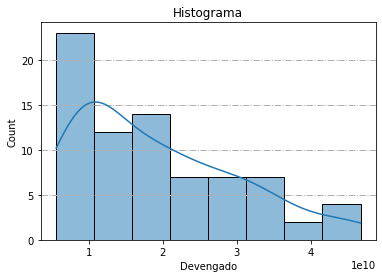

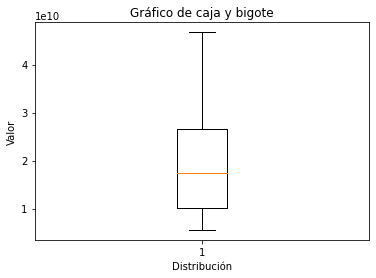

In [7]:
# Grafico de Histograma y Box-Plot 

sns.histplot(ts_train.Devengado, kde=True)
plt.title("Histograma")
plt.xlabel('Devengado')
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.show()

plt.boxplot(ts_train.Devengado, vert=True,showfliers=True)
plt.title("Gráfico de caja y bigote")
plt.xlabel("Distribución")
plt.ylabel("Valor")
plt.show()




> No se observan posibles valores atípicos, sin embargo se observa asimetría positiva, por lo tanto, en la mayoría de los trimestres se devenga una menor cantidad con respecto a los otros trimestres.

## **Gráfico de la serie**

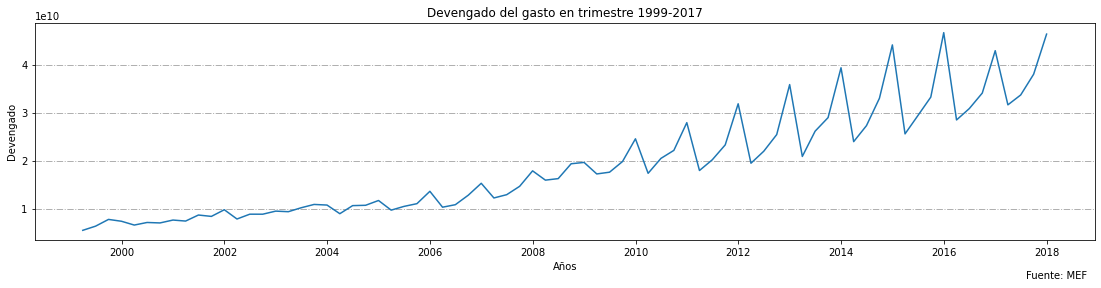

In [8]:
# Gráfico de la serie
plt.figure(figsize=(19,4))
plt.plot(ts_train)
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.xlabel("Años")
plt.ylabel("Devengado")
plt.title(r"Devengado del gasto en trimestre 1999-"+str(ts_train.index[-1].year))
plt.figtext(0.85, -0.009, "Fuente: MEF")
plt.show()

> Se observa tendencia positiva, y variabilidad con respecto al transcurso del tiempo. Esto indicaría que la serie no es estacionaria en media ni en varianza

## **Verificación de Estacionariedad**

### **Prueba Dickey-Fuller**

In [9]:
Prueba_DF = adfuller(ts_train)
print('ADF Statistic: %f' % Prueba_DF[0])
print('p-value: %f' % Prueba_DF[1])
print('Critical Values:')
for key, value in Prueba_DF[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.003354
p-value: 1.000000
Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589


### **Gráfico de la ACF**

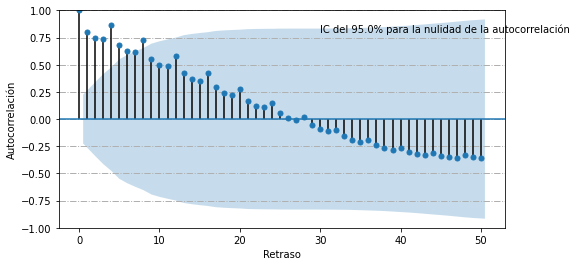

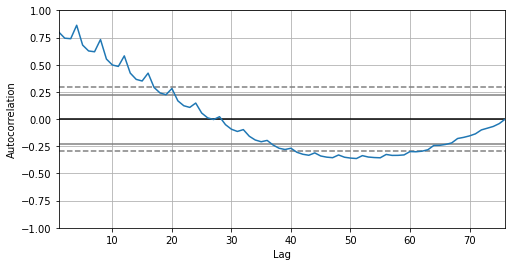

In [10]:
alpha = 0.05
fig, ax = plt.subplots(figsize=(8,4))
fig = plot_acf(ts_train, ax=ax, alpha=alpha, lags=50, title=None)
plt.xlabel('Retraso')
plt.ylabel('Autocorrelación')
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.annotate("IC del " + str(100*(1-alpha)) + "% para la nulidad de la autocorrelación", xy=(30,0.8))
plt.show()

plt.figure(figsize=(8,4))
autocorrelation_plot(ts_train)
plt.show()

### **Gráfico del Variograma**

[ 1.          0.80007584  0.74394662  0.73934324  0.86299213  0.68039951
  0.62668013  0.61915757  0.73165964  0.55187854  0.49734484  0.48440565
  0.58127623  0.42299253  0.36519094  0.35037919  0.42271664  0.29091742
  0.24048492  0.22408658  0.28114546  0.16771737  0.12257392  0.10743953
  0.14727456  0.05569306  0.0115781  -0.00424847  0.02186063 -0.05119006
 -0.09345999 -0.11376571 -0.09687336 -0.15781189 -0.19245043 -0.20844914
 -0.19626799 -0.23881808 -0.26822485 -0.2798037  -0.26833838 -0.30539663
 -0.32363577 -0.33283113 -0.31109075 -0.33946692 -0.35007369 -0.35514163
 -0.33014164 -0.35090368 -0.35864723 -0.36285977 -0.33621134 -0.349145
 -0.35379268 -0.35613314 -0.32542396 -0.33407491 -0.33358247 -0.32962401
 -0.29881982 -0.30063635 -0.29545127 -0.28222895 -0.24254202 -0.24144433
 -0.23301961 -0.21947887 -0.17869798 -0.16834404 -0.15469717 -0.13552622
 -0.0995434  -0.08372625 -0.0676513  -0.04152482]
76


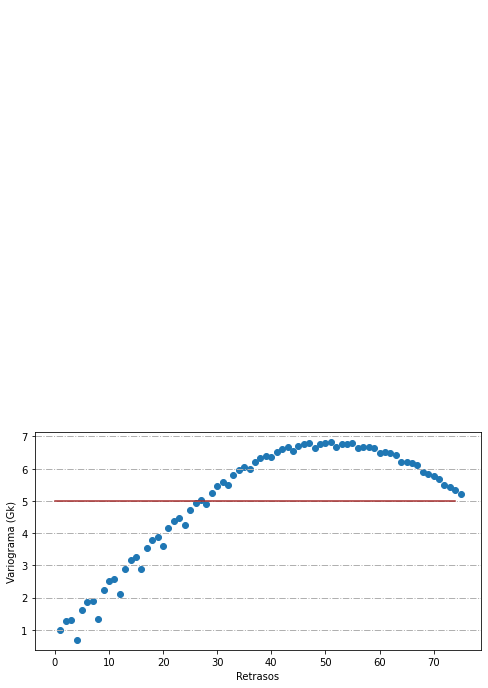

In [11]:
v_acf = acf(ts_train, fft=False, nlags=96)
print(v_acf)
print(len(v_acf))

l = []
G = []
asin = []
for i in range(1,len(ts_train)):
  l.append(i)
  G.append((1-v_acf[i])/(1-v_acf[1]))
  asin.append(1/(1-v_acf[1]))

plt.figure(figsize=(8,4))
plt.scatter(x=l, y=G)
plt.plot(asin, color="brown")
plt.xlabel('Retrasos')
plt.ylabel('Variograma (Gk)')
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.annotate(r"Asíntota en $1/(1-\rho_1)$", xy=(30,20))
plt.show()

> Según el test Dickey-Fuller y los gráficos corroboramos que la serie no es estacionaria.

## **Estabilizando la variabilidad**

### **Transformación Box-Cox**

,Devengado,Devengado_BC
Tiempo,,
1999-03-31,5556160646,12.589807
1999-06-30,6423105672,12.629426
1999-09-30,7828654515,12.682965
1999-12-31,7445509920,12.669447
2000-03-31,6652633175,12.638970
...,...,...
2016-12-31,42988516970,13.119365
2017-03-31,31701415874,13.044436
2017-06-30,33760658159,13.060027


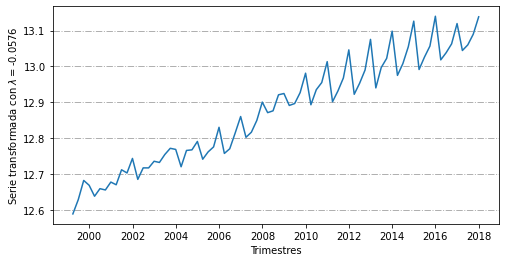

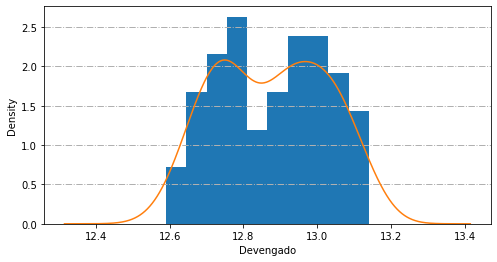

In [12]:
# Transformación Box-Cox
from scipy.stats import boxcox

v_bc, lmbda = boxcox(ts_train.Devengado)
ts_train['Devengado_BC'] = v_bc
display(ts_train)

plt.figure(figsize=(8, 4))
plt.plot(ts_train.Devengado_BC)
plt.xlabel('Trimestres')
plt.ylabel(r"Serie transformada con $\lambda=$"+str(round(lmbda,4)))
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.show()

plt.figure(figsize=(8,4))
plt.hist(ts_train.Devengado_BC, density=True)
ts_train.Devengado_BC.plot(kind='kde')
plt.xlabel('Devengado')
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.show()

## **Eliminar la tendencia**

,Devengado,Devengado_BC,Devengado_dif1,Devengado_dif2,Devengado_BC_dif1,Devengado_BC_dif2,Devengado_BC_dif3
Tiempo,,,,,,,
1999-03-31,5556160646,12.589807,NaN,NaN,NaN,NaN,NaN
1999-06-30,6423105672,12.629426,8.669450e+08,NaN,0.039618,NaN,NaN
1999-09-30,7828654515,12.682965,1.405549e+09,2.272494e+09,0.053540,0.093158,NaN
1999-12-31,7445509920,12.669447,-3.831446e+08,1.022404e+09,-0.013519,0.040021,0.079639
2000-03-31,6652633175,12.638970,-7.928767e+08,-1.176021e+09,-0.030477,-0.043996,0.009544
...,...,...,...,...,...,...,...
2016-12-31,42988516970,13.119365,8.829521e+09,1.205607e+10,0.056439,0.081028,0.100972
2017-03-31,31701415874,13.044436,-1.128710e+10,-2.457580e+09,-0.074929,-0.018490,0.006099
2017-06-30,33760658159,13.060027,2.059242e+09,-9.227859e+09,0.015591,-0.059338,-0.002900


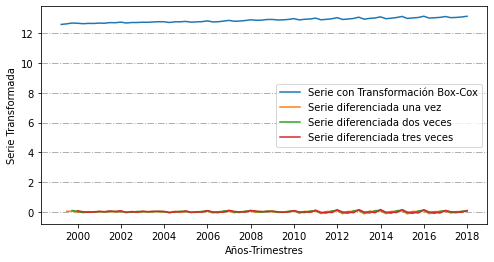

In [13]:
ts_train['Devengado_dif1'] = ts_train.Devengado.diff()
ts_train['Devengado_dif2'] = ts_train.Devengado.diff(2)
ts_train['Devengado_BC_dif1'] = ts_train.Devengado_BC.diff()
ts_train['Devengado_BC_dif2'] = ts_train.Devengado_BC.diff(2)
ts_train['Devengado_BC_dif3'] = ts_train.Devengado_BC.diff(3)
display(ts_train)

plt.figure(figsize=(8, 4))
plt.plot(ts_train.Devengado_BC)
plt.plot(ts_train.Devengado_BC_dif1)
plt.plot(ts_train.Devengado_BC_dif2)
plt.plot(ts_train.Devengado_BC_dif3)
plt.xlabel('Años-Trimestres')
plt.ylabel("Serie Transformada")
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.legend(["Serie con Transformación Box-Cox", "Serie diferenciada una vez", "Serie diferenciada dos veces", "Serie diferenciada tres veces"], fontsize=10)

plt.show()

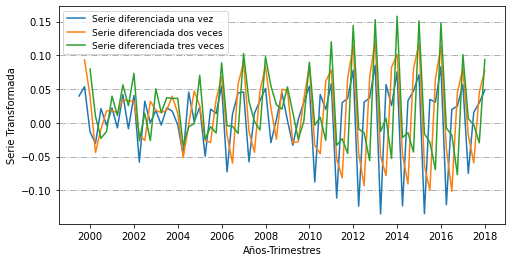

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(ts_train.Devengado_BC_dif1)
plt.plot(ts_train.Devengado_BC_dif2)
plt.plot(ts_train.Devengado_BC_dif3)
plt.xlabel('Años-Trimestres')
plt.ylabel("Serie Transformada")
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.legend(["Serie diferenciada una vez", "Serie diferenciada dos veces","Serie diferenciada tres veces"], fontsize=9,loc ='best')

plt.show()

## **Verificación de estacionariedad**

### **Prueba Dickey-Fuller**

In [15]:
print("Serie con una diferenciación")
Prueba_DF = adfuller(ts_train.Devengado_dif1[1:])
print('ADF Statistic: %f' % Prueba_DF[0])
print('p-value: %f' % Prueba_DF[1])
print('Critical Values:')
for key, value in Prueba_DF[4].items():
  print('\t%s: %.3f' % (key, value))

print("====================================================")
print("Serie con dos diferenciaciones")
Prueba_DF = adfuller(ts_train.Devengado_dif2[2:])
print('ADF Statistic: %f' % Prueba_DF[0])
print('p-value: %f' % Prueba_DF[1])
print('Critical Values:')
for key, value in Prueba_DF[4].items():
  print('\t%s: %.3f' % (key, value))


print("Serie con Transformación Box-Cox")
Prueba_DF = adfuller(ts_train.Devengado_BC)
print('ADF Statistic: %f' % Prueba_DF[0])
print('p-value: %f' % Prueba_DF[1])
print('Critical Values:')
for key, value in Prueba_DF[4].items():
  print('\t%s: %.3f' % (key, value))

print("====================================================")
print("Serie con Transformación Box-Cox y una diferenciación")
Prueba_DF = adfuller(ts_train.Devengado_BC_dif1[1:])
print('ADF Statistic: %f' % Prueba_DF[0])
print('p-value: %f' % Prueba_DF[1])
print('Critical Values:')
for key, value in Prueba_DF[4].items():
  print('\t%s: %.3f' % (key, value))

print("====================================================")
print("Serie con Transformación Box-Cox y dos diferenciaciones")
Prueba_DF = adfuller(ts_train.Devengado_BC_dif2[2:])
print('ADF Statistic: %f' % Prueba_DF[0])
print('p-value: %f' % Prueba_DF[1])
print('Critical Values:')
for key, value in Prueba_DF[4].items():
  print('\t%s: %.3f' % (key, value))

print("====================================================")
print("Serie con Transformación Box-Cox y tres diferenciaciones")
Prueba_DF = adfuller(ts_train.Devengado_BC_dif3[3:])
print('ADF Statistic: %f' % Prueba_DF[0])
print('p-value: %f' % Prueba_DF[1])
print('Critical Values:')
for key, value in Prueba_DF[4].items():
  print('\t%s: %.3f' % (key, value))

Serie con una diferenciación
ADF Statistic: -2.040131
p-value: 0.269259
Critical Values:
	1%: -3.532
	5%: -2.906
	10%: -2.590
Serie con dos diferenciaciones
ADF Statistic: -2.074849
p-value: 0.254747
Critical Values:
	1%: -3.532
	5%: -2.906
	10%: -2.590
Serie con Transformación Box-Cox
ADF Statistic: -0.704741
p-value: 0.845518
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
Serie con Transformación Box-Cox y una diferenciación
ADF Statistic: -4.556582
p-value: 0.000155
Critical Values:
	1%: -3.527
	5%: -2.904
	10%: -2.589
Serie con Transformación Box-Cox y dos diferenciaciones
ADF Statistic: -2.719963
p-value: 0.070647
Critical Values:
	1%: -3.532
	5%: -2.906
	10%: -2.590
Serie con Transformación Box-Cox y tres diferenciaciones
ADF Statistic: -3.150265
p-value: 0.023050
Critical Values:
	1%: -3.542
	5%: -2.910
	10%: -2.593


## **Gráfico de ACF Y PACF**

### **ACF-MA** 

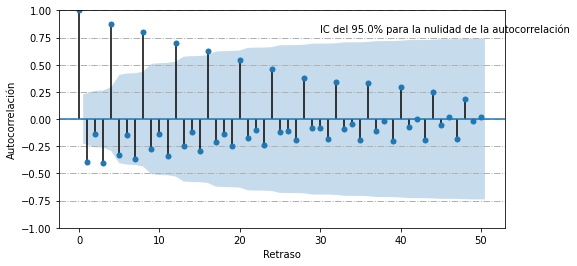

In [16]:
alpha = 0.05
fig, ax = plt.subplots(figsize=(8,4))
fig = plot_acf(ts_train.Devengado_BC_dif1[1:], ax=ax, alpha=alpha, lags=50, title=None)
plt.xlabel('Retraso')
plt.ylabel('Autocorrelación')
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.annotate("IC del " + str(100*(1-alpha)) + "% para la nulidad de la autocorrelación", xy=(30,0.8))
plt.show()

### **PACF-AR**

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


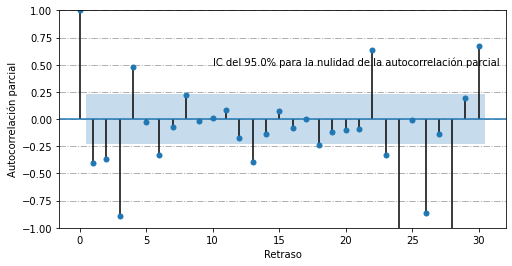

In [17]:
alpha = 0.05
fig, ax = plt.subplots(figsize=(8,4))
fig = plot_pacf(ts_train.Devengado_BC_dif1[1:] , ax=ax, alpha=alpha, lags=30, title=None)
plt.xlabel('Retraso')
plt.ylabel('Autocorrelación parcial')
plt.grid(axis='y', linestyle='dashdot', linewidth=1)
plt.annotate("IC del " + str(100*(1-alpha)) + "% para la nulidad de la autocorrelación parcial", xy=(10,0.5))
plt.show()

## **Determinar modelos**

In [21]:
mod1 = sm.tsa.ARIMA(ts_train.Devengado_BC, order=(3,1,3))
res1 = mod1.fit()
print(res1.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Devengado_BC   No. Observations:                   76
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 179.575
Date:                Thu, 02 Feb 2023   AIC                           -345.151
Time:                        16:26:27   BIC                           -328.928
Sample:                    03-31-1999   HQIC                          -338.673
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9570      0.047    -20.294      0.000      -1.049      -0.865
ar.L2         -0.9746      0.036    -26.707      0.000      -1.046      -0.903
ar.L3         -0.9500      0.040    -23.918      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
mod2 = sm.tsa.ARIMA(ts_train.Devengado_BC, order=(3,1,2))
res2 = mod2.fit()
print(res2.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Devengado_BC   No. Observations:                   76
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 176.361
Date:                Thu, 02 Feb 2023   AIC                           -340.722
Time:                        16:26:43   BIC                           -326.817
Sample:                    03-31-1999   HQIC                          -335.170
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9278      0.059    -15.599      0.000      -1.044      -0.811
ar.L2         -0.9599      0.049    -19.630      0.000      -1.056      -0.864
ar.L3         -0.9016      0.054    -16.566      0.0

In [23]:
mod3 = sm.tsa.ARIMA(ts_train.Devengado_BC, order=(3,1,0))
res3 = mod3.fit()
print(res3.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Devengado_BC   No. Observations:                   76
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 157.892
Date:                Thu, 02 Feb 2023   AIC                           -307.785
Time:                        16:26:56   BIC                           -298.515
Sample:                    03-31-1999   HQIC                          -304.084
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7882      0.112     -7.053      0.000      -1.007      -0.569
ar.L2         -0.7614      0.103     -7.387      0.000      -0.963      -0.559
ar.L3         -0.7881      0.085     -9.301      0.0

In [25]:
mod4 = auto_arima(ts_train.Devengado_BC, max_p=10, max_q=10)
print(mod4)
print(mod4.summary())

 ARIMA(3,1,2)(0,0,0)[0] intercept
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   76
Model:               SARIMAX(3, 1, 2)   Log Likelihood                 191.302
Date:                Thu, 02 Feb 2023   AIC                           -368.604
Time:                        16:28:29   BIC                           -352.381
Sample:                    03-31-1999   HQIC                          -362.126
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0239      0.004      6.554      0.000       0.017       0.031
ar.L1         -0.9508      0.053    -17.776      0.000      -1.056      -0.846
ar.L2         -0.9

## **Evaluación de modelos**

,Devengado,Devengado_BC
Tiempo,,
2018-03-31,33753769300,13.059976
2018-06-30,34652415221,13.066469
2018-09-30,39302079687,13.097445
2018-12-31,51723703561,13.164236
2019-03-31,32741619517,13.052441
2019-06-30,35957820865,13.075590
2019-09-30,41552608987,13.111072
2019-12-31,51111332233,13.161361
2020-03-31,35887502299,13.075107


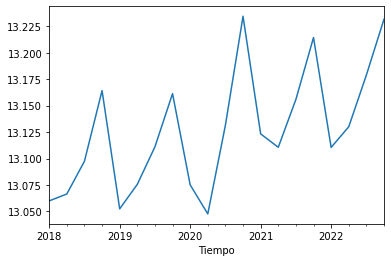

In [26]:
# Transformando lod datos de prueba con el lambda obtenido en el conjunto de entrenamiento
ts_test['Devengado_BC'] = (np.power(ts_test.Devengado,lmbda)-1)/lmbda
display(ts_test)
ts_test.Devengado_BC.plot()


In [27]:
n_per =len(ts_test)
ts_test['Predict_Mod1']= res1.forecast(n_per)
ts_test['Predict_Mod2']= res2.forecast(n_per)
ts_test['Predict_Mod3']= res3.forecast(n_per)
ts_test['Predict_Mod4']= mod4.predict(n_periods=n_per)

In [33]:
# Función RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

print("==============================================================")
print("RMSE del Modelo 1 : ", rmse(ts_test.Devengado_BC,ts_test.Predict_Mod1))
print("RMSE del Modelo 2 : ", rmse(ts_test.Devengado_BC,ts_test.Predict_Mod2))
print("RMSE del Modelo 3 : ", rmse(ts_test.Devengado_BC,ts_test.Predict_Mod3))
print("RMSE del Modelo 4 : ", rmse(ts_test.Devengado_BC,ts_test.Predict_Mod4))

RMSE del Modelo 1 :  0.054468227872256685
RMSE del Modelo 2 :  0.05471238372210487
RMSE del Modelo 3 :  0.06315201793952334
RMSE del Modelo 4 :  0.03975291181908315


> Nos   quedamos con el cuarto modelo que nos ofrece el menor RMSE en el conjunto de Prueba

### **Grafico de los valores ajustados y pronósticados**

In [34]:
ts_train['Fitted_Mod4']= mod4.predict_in_sample(ts_train.Devengado_BC)
ts_train

,Devengado,Devengado_BC,Devengado_dif1,Devengado_dif2,Devengado_BC_dif1,Devengado_BC_dif2,Devengado_BC_dif3,Fitted_Mod4
Tiempo,,,,,,,,
1999-03-31,5556160646,12.589807,NaN,NaN,NaN,NaN,NaN,0.006215
1999-06-30,6423105672,12.629426,8.669450e+08,NaN,0.039618,NaN,NaN,12.596022
1999-09-30,7828654515,12.682965,1.405549e+09,2.272494e+09,0.053540,0.093158,NaN,12.621858
1999-12-31,7445509920,12.669447,-3.831446e+08,1.022404e+09,-0.013519,0.040021,0.079639,12.649690
2000-03-31,6652633175,12.638970,-7.928767e+08,-1.176021e+09,-0.030477,-0.043996,0.009544,12.621166
...,...,...,...,...,...,...,...,...
2016-12-31,42988516970,13.119365,8.829521e+09,1.205607e+10,0.056439,0.081028,0.100972,13.150612
2017-03-31,31701415874,13.044436,-1.128710e+10,-2.457580e+09,-0.074929,-0.018490,0.006099,13.034330
2017-06-30,33760658159,13.060027,2.059242e+09,-9.227859e+09,0.015591,-0.059338,-0.002900,13.056825


In [35]:
n_per = len(ts_test)
pred, ci = mod4.predict(n_periods=n_per, return_conf_int=True)

df_pred = pd.DataFrame({'Devengado_BC_Pred': pred, 'Devengado_BC_Pred_li': ci[:,0],
                        'Devengado_BC_Pred_ls': ci[:,1]})

In [36]:
df_pred

,Devengado_BC_Pred,Devengado_BC_Pred_li,Devengado_BC_Pred_ls
2018-03-31,13.071753,13.036233,13.107272
2018-06-30,13.083947,13.046478,13.121416
2018-09-30,13.114122,13.075212,13.153033
2018-12-31,13.159882,13.120956,13.198807
2019-03-31,13.100060,13.048707,13.151413
2019-06-30,13.108924,13.055953,13.161895
2019-09-30,13.138517,13.084533,13.192501
2019-12-31,13.181836,13.127814,13.235858
2020-03-31,13.128010,13.065392,13.190628
2020-06-30,13.134045,13.069904,13.198186


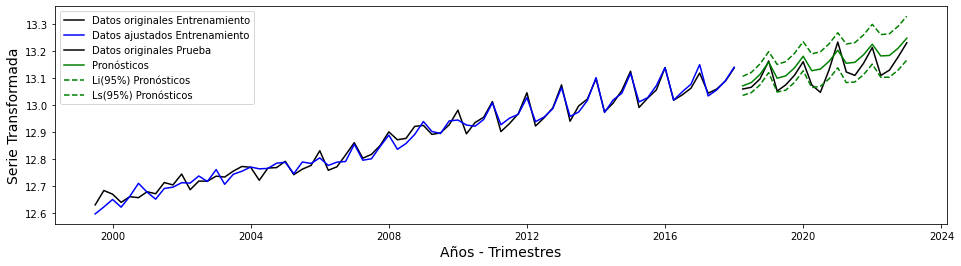

In [37]:
plt.figure(figsize=(16, 4))
plt.plot(ts_train.Devengado_BC[1:], color='black', label="Datos originales Entrenamiento")
plt.plot(ts_train.Fitted_Mod4[1:], color='blue', label="Datos ajustados Entrenamiento")
plt.plot(ts_test.Devengado_BC, color='black', label="Datos originales Prueba")
plt.plot(df_pred.Devengado_BC_Pred, color='green', label="Pronósticos")
plt.plot(df_pred.Devengado_BC_Pred_li, color='green', linestyle='dashed', label="Li(95%) Pronósticos")
plt.plot(df_pred.Devengado_BC_Pred_ls, color='green', linestyle='dashed', label="Ls(95%) Pronósticos")
plt.xlabel('Años - Trimestres', fontsize=14)
plt.ylabel("Serie Transformada", fontsize=14)
plt.legend(loc='best')

plt.show()


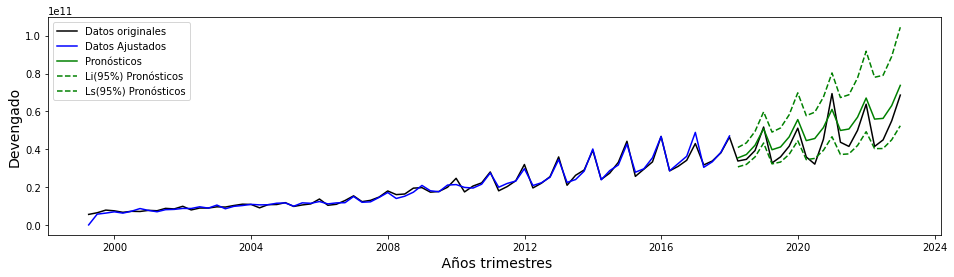

In [42]:
plt.figure(figsize=(16, 4))
plt.plot(ts.Devengado, color='black', label="Datos originales")
plt.plot(np.power(lmbda*ts_train.Fitted_Mod4+1,1/lmbda), color='blue', label="Datos Ajustados")

plt.plot(np.power(lmbda*df_pred.Devengado_BC_Pred+1,1/lmbda), color='green', label="Pronósticos")
plt.plot(np.power(lmbda*df_pred.Devengado_BC_Pred_li+1,1/lmbda), color='green', linestyle='dashed', label="Li(95%) Pronósticos")
plt.plot(np.power(lmbda*df_pred.Devengado_BC_Pred_ls+1,1/lmbda), color='green', linestyle='dashed', label="Ls(95%) Pronósticos")
plt.ylabel("Devengado", fontsize=14)
plt.xlabel(" Años trimestres", fontsize=14)
plt.legend(loc='best')
plt.show()

> Vemos un desempeño del modelo ARIMA(3,1,2) aceptable con intervalo de predicción del 95%

# Conclusión:
- El modelo que mejor desempeño tiene es ARIMA(3,1,2), ademas de cumplir con el supuesto de independencia de errores.